In [1]:
import re
import pandas as pd
import numpy as np
import json
import subprocess
import glob
import os

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
from matplotlib import cm
matplotlib.style.use('ggplot')
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch

In [12]:
N_SEEDS = 150
N_SEI = 20
N_TESTS = 4
N_TICKS = 260
N_TICKS_DISPLAY = 260 - 52
N_TICKS_BURN = N_TICKS - N_TICKS_DISPLAY

In [13]:
def collect_data_for_simulation_runs_from_inst(N_TESTS, dfs_inst, dfs_inst_std):

    test_mode = 'BaseVer02'
    data_mode = 'CA'
    #here think how to change it
    params_versions = [str(x) for x in np.linspace(0.0,0.3,N_TESTS,endpoint=True)]

    #names of columns in a file
    names = ['Tick', 'Location_x', 'Location_y', 'Uid', 'Price_per_watt', 'DC_size', 'Origin', 'Efficency','EquipmentType', 'InteractionType','Mart_type']


    for i_run in range(N_TESTS): 
        #read few files
        #save into database
        dfs_ = []
        #read last simulation result
        files = glob.glob('..\\..\\ABMIRISLab\\Saves\\May-14-2018\\BaseModel\\'+ test_mode + '\\' + data_mode + \
                 '\\tariff' + params_versions[i_run] + '\\*[_pr].csv')
        files.sort(key=os.path.getmtime, reverse=True)

        #take top x files 
        for file in files[0 * N_SEEDS : 1 * N_SEEDS]:
            print(file)
            df_ = pd.read_csv(file, names=names, low_memory=False, na_values = ['-nan(ind)'])
            dfs_.append(df_)


        #create df from them    
        df_concat = pd.concat(dfs_)
        
        
        df_inst_mean = df_concat.groupby(level=0).mean()
        df_inst_std = df_concat.groupby(level=0).std()
        
        dfs_inst.append(dfs_)


In [14]:
dfs_inst = []
dfs_inst_std = []
collect_data_for_simulation_runs_from_inst(N_TESTS, dfs_inst, dfs_inst_std)

..\..\ABMIRISLab\Saves\May-14-2018\BaseModel\BaseVer02\CA\tariff0.0\8cca197b-160a-415d-b38d-a9117957b4eb_pr.csv
..\..\ABMIRISLab\Saves\May-14-2018\BaseModel\BaseVer02\CA\tariff0.0\2b103558-3f2a-49d9-ac38-f91c06f1605e_pr.csv
..\..\ABMIRISLab\Saves\May-14-2018\BaseModel\BaseVer02\CA\tariff0.0\ec497f92-b614-4e1f-b57d-ecd63d9d1318_pr.csv
..\..\ABMIRISLab\Saves\May-14-2018\BaseModel\BaseVer02\CA\tariff0.0\8a6a46cb-c500-4a18-ad80-049067250595_pr.csv
..\..\ABMIRISLab\Saves\May-14-2018\BaseModel\BaseVer02\CA\tariff0.0\8fe24dde-498f-4654-ba80-84512bbde3b3_pr.csv
..\..\ABMIRISLab\Saves\May-14-2018\BaseModel\BaseVer02\CA\tariff0.0\d4a8c1c1-9270-46a9-9f64-c2c6da31d704_pr.csv
..\..\ABMIRISLab\Saves\May-14-2018\BaseModel\BaseVer02\CA\tariff0.0\6afa6fe0-ffeb-44bc-959f-5f901e267c93_pr.csv
..\..\ABMIRISLab\Saves\May-14-2018\BaseModel\BaseVer02\CA\tariff0.0\055ae1b0-cd13-47ff-a564-197985c8a99c_pr.csv
..\..\ABMIRISLab\Saves\May-14-2018\BaseModel\BaseVer02\CA\tariff0.0\43e8e260-128e-4e69-b0d9-1fbbd42506a5

In [5]:
N = 19





x = df_inst_all['DC_size']/1000
y = df_inst_all['Price_per_watt']
norm = matplotlib.colors.Normalize(vmin=df_inst_all['Count'].values[N-1], vmax=df_inst_all['Count'].values[0])
cmap_custom = cm.get_cmap('Spectral')
area = norm(df_inst_all['Count'])
color = []

for area_x in area:
#    color.append(cmap_custom(area_x/2))
    color.append('olive')
    

    
#color[1] = (0.0, 0.65, 0.75, 1.0)
    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('DC size')
ax.set_ylabel('Price Per Watt')

#ax.set_autoscaley_on(False)
ax.set_xlim([2.5,7.0])
ax.set_ylim([2.0,3.0])
    
#plt.xlabel('Price Per Watt')
#plt.ylabel('System Size AC')
#plt.title('Number of Installations Per Company')

ax.scatter(x, y, s=df_inst_all['Count'] * 10,  c = color )
handles, labels = ax.get_legend_handles_labels()


#names are here
#df_agg.index.values[0:3]

#colors are here
#color[0:3]

artists = []
labels = []

#create custom artists
#for i in range(3):
#    artists.append(mpatches.Circle((0, 0), 1.0, facecolor=color[i]))
#    labels.append(df_agg_dm1.index.values[i])

artists.append(mpatches.Circle((0, 0), 1.0, facecolor=color[-1], label='min'))
labels.append('min N installs')
artists.append(mpatches.Circle((0, 0), 1.0, facecolor=color[0], label='max'))
labels.append('max N installs')
    

class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
#        print(orig_handle.__dict__)
        radius_ = width/10
        if ('max' in orig_handle._label):
            radius_ = width/5
    
        p = mpatches.Circle(xy=center, radius=radius_)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]
    

#Create legend from custom artist/label lists
ax.legend(artists,
          labels,
         handler_map={mpatches.Circle: HandlerEllipse()}, bbox_to_anchor=(0.9, 0.9),
           bbox_transform=plt.gcf().transFigure, fontsize=5
         )



#plt.scatter(x, y, s=df_agg_top['Count'],  c = color )
data_mode = 'test'
plt.savefig('Simulation_results_installers_' + data_mode + '_Apr19' + '.png', dpi=300)
plt.show()

NameError: name 'df_inst_all' is not defined

In [11]:
print(len(dfs_inst[0]))

8


In [16]:
heatmap, xedges, yedges = np.histogram2d(pd.concat(dfs_inst[0])['DC_size'], pd.concat(dfs_inst[0])['Price_per_watt'], bins=(64,64))

In [17]:
print(heatmap)

[[  0.   0.   1. ...,   0.   0.   1.]
 [  0.   1.   0. ...,   0.   0.   5.]
 [  0.   0.   1. ...,   0.   0.   1.]
 ..., 
 [  0.   0.   0. ...,   0.   0.   4.]
 [  0.   0.   0. ...,   0.   0.   2.]
 [  1.   2.   3. ...,   0.   0.  48.]]


In [14]:
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

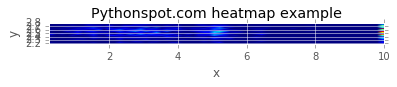

In [15]:
# Plot heatmap
plt.clf()
plt.title('Pythonspot.com heatmap example')
plt.ylabel('y')
plt.xlabel('x')
plt.imshow(heatmap, extent=extent)
plt.show()

In [18]:
import seaborn as sns; sns.set(color_codes=True)

ModuleNotFoundError: No module named 'seaborn'

In [15]:
x = pd.concat(dfs_inst[0])['DC_size']/1000

In [16]:
y = pd.concat(dfs_inst[0])['Price_per_watt']

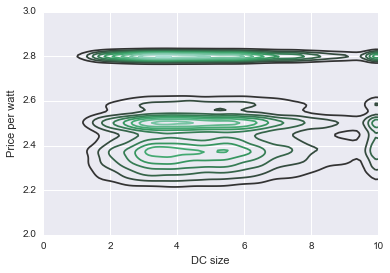

In [17]:
ax = sns.kdeplot(x, y, shade=False)
ax.set(xlim=(0, 10), ylim=(2, 3))
plt.xlabel('DC size')
plt.ylabel('Price per watt')
#ax.set_xlim([0,10.0])
#ax.set_ylim([2.0,3.0])

[]

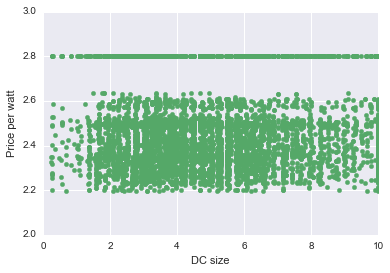

In [55]:
ax3 = plt.scatter(x, y, color='g')

plt.xlim([0,10.0])
plt.ylim([2.0,3.0])
plt.xlabel('DC size')
plt.ylabel('Price per watt')

plt.plot()

In [18]:
x1 = pd.concat(dfs_inst[-1])['DC_size']/1000

In [19]:
y1 = pd.concat(dfs_inst[-1])['Price_per_watt']

(2.0, 3.0)

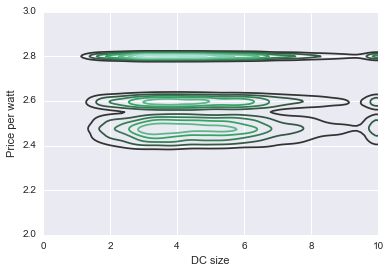

In [20]:
ax = sns.kdeplot(x1, y1, shade=False, shade_lowest=True)
#ax = sns.kdeplot(x, y, shade=False, cmap='Reds')
plt.xlabel('DC size')
plt.ylabel('Price per watt')
ax.set_xlim([0,10.0])
ax.set_ylim([2.0,3.0])

[]

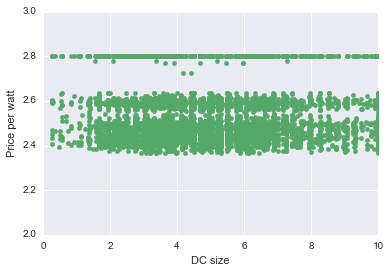

In [59]:
ax4 = plt.scatter(x1, y1, color='g')

plt.xlim([0,10.0])
plt.ylim([2.0,3.0])
plt.xlabel('DC size')
plt.ylabel('Price per watt')

plt.plot()

In [44]:
x,y = ax.get_lines()[0].get_data()

IndexError: list index out of range

In [45]:
ax.get_lines()

<a list of 0 Line2D objects>

In [ ]:
ax.__dict__

In [17]:
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
dens_u = sm.nonparametric.KDEMultivariate(data=[x1,x2], var_type='cc', bw='normal_reference')

In [55]:
def collect_data_for_simulation_runs_from_inst_eff(N_TESTS, dfs_inst, dfs_inst_std):

    test_mode = 'BaseVer02'
    data_mode = 'CA'
    #here think how to change it
    params_versions = [str(x) for x in np.linspace(1.0,1.2,N_TESTS,endpoint=True)]

    #names of columns in a file
    names = ['Tick', 'Location_x', 'Location_y', 'Uid', 'Price_per_watt', 'DC_size', 'Origin', 'Mart_type']


    for i_run in range(N_TESTS): 
        #read few files
        #save into database
        dfs_ = []
        #read last simulation result
        files = glob.glob('..\\..\\ABMIRISLab\\Saves\\Jan-11-2018\\BaseModel\\'+ test_mode + '\\' + data_mode + \
                 '\\' + params_versions[i_run] + '\\*[_pr].csv')
        files.sort(key=os.path.getmtime, reverse=True)

        #take top x files 
        for file in files[0 * N_SEEDS : 1 * N_SEEDS]:
            print(file)
            df_ = pd.read_csv(file, names=names, low_memory=False, na_values = ['-nan(ind)'])
            dfs_.append(df_)


        #create df from them    
        df_concat = pd.concat(dfs_)
        
        
        df_inst_mean = df_concat.groupby(level=0).mean()
        df_inst_std = df_concat.groupby(level=0).std()
        
        dfs_inst.append(dfs_)


In [56]:
dfs_inst_eff = []
dfs_inst_eff_std = []
collect_data_for_simulation_runs_from_inst_eff(5, dfs_inst_eff, dfs_inst_eff_std)

..\..\ABMIRISLab\Saves\Jan-11-2018\BaseModel\BaseVer02\CA\1.0\1cf398ca-b66e-4329-a05a-4e89c685df5d_pr.csv
..\..\ABMIRISLab\Saves\Jan-11-2018\BaseModel\BaseVer02\CA\1.0\1cb8c983-c20f-4b71-90b6-b4bdbe40de00_pr.csv
..\..\ABMIRISLab\Saves\Jan-11-2018\BaseModel\BaseVer02\CA\1.0\079d47b3-55f9-47dc-8e81-ad7d70d77c14_pr.csv
..\..\ABMIRISLab\Saves\Jan-11-2018\BaseModel\BaseVer02\CA\1.0\60eec37d-b222-4eb1-8d64-e1bb5d1bb355_pr.csv
..\..\ABMIRISLab\Saves\Jan-11-2018\BaseModel\BaseVer02\CA\1.0\681a3dae-cc2e-4019-982f-2196e3ce769d_pr.csv
..\..\ABMIRISLab\Saves\Jan-11-2018\BaseModel\BaseVer02\CA\1.0\c15a8636-64ab-4e58-a772-0b582fefc0ce_pr.csv
..\..\ABMIRISLab\Saves\Jan-11-2018\BaseModel\BaseVer02\CA\1.0\89ef1568-dcbc-46e4-a1f0-3fb0b2b78ded_pr.csv
..\..\ABMIRISLab\Saves\Jan-11-2018\BaseModel\BaseVer02\CA\1.0\8f4df266-dfa7-4aff-b8d3-175e76cfbee0_pr.csv
..\..\ABMIRISLab\Saves\Jan-11-2018\BaseModel\BaseVer02\CA\1.05\516a2ac4-0171-41fb-8290-fe31bfc2a0ac_pr.csv
..\..\ABMIRISLab\Saves\Jan-11-2018\BaseModel\

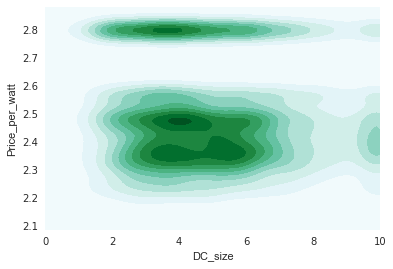

In [59]:
x2 = pd.concat(dfs_inst_eff[0])['DC_size']/1000
y2 = pd.concat(dfs_inst_eff[0])['Price_per_watt']
ax = sns.kdeplot(x2, y2, shade=True, clip = ((0.0, 10.0),(2.0, 3.0)), shade_lowest=True)

In [61]:
import random

In [63]:
heatmap = [[100 + random.randint(0, 20)  for i in range(15) ] for j in range(15)]

In [64]:
print(heatmap)

[[117, 106, 103, 111, 113, 108, 113, 116, 107, 104, 106, 109, 109, 105, 102], [114, 113, 118, 101, 112, 102, 113, 116, 119, 117, 118, 114, 103, 111, 100], [102, 110, 117, 119, 116, 104, 109, 102, 120, 103, 112, 103, 100, 110, 119], [120, 102, 119, 119, 114, 100, 113, 120, 120, 104, 114, 112, 100, 101, 107], [107, 105, 119, 104, 109, 101, 110, 101, 117, 108, 106, 100, 100, 108, 110], [103, 100, 101, 101, 108, 109, 102, 107, 109, 102, 102, 115, 106, 106, 107], [104, 115, 112, 118, 114, 105, 107, 112, 103, 115, 109, 117, 109, 100, 110], [100, 105, 120, 105, 114, 109, 115, 116, 108, 118, 120, 112, 103, 109, 106], [114, 110, 115, 116, 106, 101, 105, 114, 103, 104, 100, 116, 101, 102, 109], [101, 116, 109, 120, 101, 110, 112, 117, 104, 102, 114, 113, 100, 119, 104], [102, 106, 114, 108, 106, 107, 120, 102, 116, 100, 120, 111, 101, 102, 101], [110, 110, 117, 104, 116, 111, 103, 106, 107, 120, 103, 114, 105, 104, 103], [110, 105, 107, 110, 106, 115, 114, 120, 108, 114, 109, 119, 106, 117, 117]

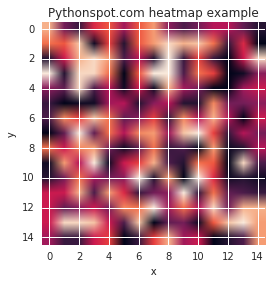

In [65]:
# Plot heatmap
plt.clf()
plt.title('Pythonspot.com heatmap example')
plt.ylabel('y')
plt.xlabel('x')
plt.imshow(heatmap)
plt.show()

In [2]:
N_SEEDS = 100

In [5]:
#read data into dataframe 
#append columns with eff and costs

def collect_data_for_simulation_runs_from_inst_eff(N_TESTS, dfs_inst, dfs_inst_std):

    test_mode = 'BaseVer02'
    data_mode = 'CA'
    #here think how to change it
    params_versions = [['eff' + str(x) + 'cost' + str(y) for y in np.linspace(0.8,1.2,N_TESTS,endpoint=True)]\
                        for x in np.linspace(1.0,1.2,N_TESTS,endpoint=True)]
    effs = [x for x in np.linspace(1.0,1.2,N_TESTS,endpoint=True)]
    costs = [x for x in np.linspace(0.8,1.2,N_TESTS,endpoint=True)]

    #names of columns in a file
    names = ['Tick', 'Location_x', 'Location_y', 'Uid', 'Price_per_watt', 'DC_size', 'Origin', 'Mart_type']


    for i_run in range(N_TESTS): 
        for j_run in range(N_TESTS):
            #read few files
            #save into database
            dfs_ = []
            #read last simulation result
            files = glob.glob('..\\..\\ABMIRISLab\\Saves\\May-14-2018\\BaseModel\\'+ test_mode + '\\' + data_mode + \
                     '\\' + params_versions[i_run][j_run] + '\\*[_pr].csv')
            
            files.sort(key=os.path.getmtime, reverse=True)

            #take top x files 
            for file in files[0 * N_SEEDS : 1 * N_SEEDS]:
                print(file)
                df_ = pd.read_csv(file, names=names, low_memory=False, na_values = ['-nan(ind)'])
                df_['eff'] = effs[i_run]
                df_['cost'] = costs[j_run]
                dfs_.append(df_)


            #create df from them    
            df_concat = pd.concat(dfs_)


            df_inst_mean = df_concat.groupby(level=0).mean()
            df_inst_std = df_concat.groupby(level=0).std()

            dfs_inst.append(dfs_)


In [ ]:
for adjustment_eff in np.linspace(1.0,1.2,5,endpoint=True):
    for adjustment_cost in np.linspace(0.8, 1.2, 5, endpoint=True):
        

In [96]:
 params_versions = [['eff' + str(x) + 'cost' + str(y) for y in  np.linspace(0.8,1.2,5,endpoint=True)] \
                    for x in np.linspace(1.0,1.2,5,endpoint=True)]

In [97]:
print(params_versions)

[['eff1.0cost0.8', 'eff1.0cost0.9', 'eff1.0cost1.0', 'eff1.0cost1.1', 'eff1.0cost1.2'], ['eff1.05cost0.8', 'eff1.05cost0.9', 'eff1.05cost1.0', 'eff1.05cost1.1', 'eff1.05cost1.2'], ['eff1.1cost0.8', 'eff1.1cost0.9', 'eff1.1cost1.0', 'eff1.1cost1.1', 'eff1.1cost1.2'], ['eff1.15cost0.8', 'eff1.15cost0.9', 'eff1.15cost1.0', 'eff1.15cost1.1', 'eff1.15cost1.2'], ['eff1.2cost0.8', 'eff1.2cost0.9', 'eff1.2cost1.0', 'eff1.2cost1.1', 'eff1.2cost1.2']]


In [6]:
dfs_inst_eff = []
dfs_inst_eff_std = []
collect_data_for_simulation_runs_from_inst_eff(5, dfs_inst_eff, dfs_inst_eff_std)

../../ABMIRISLab/Saves/May-14-2018/BaseModel/BaseVer02/CA/eff1.0cost0.8/9e22850c-ccd1-4782-bd77-981e3543c737_pr.csv
../../ABMIRISLab/Saves/May-14-2018/BaseModel/BaseVer02/CA/eff1.0cost0.8/84602efd-815b-42bb-948c-596ac39789e1_pr.csv
../../ABMIRISLab/Saves/May-14-2018/BaseModel/BaseVer02/CA/eff1.0cost0.8/570a2f12-398c-4011-8e0b-92168f49037d_pr.csv
../../ABMIRISLab/Saves/May-14-2018/BaseModel/BaseVer02/CA/eff1.0cost0.8/9754b68a-dcde-4166-b1b0-bd775b63f518_pr.csv
../../ABMIRISLab/Saves/May-14-2018/BaseModel/BaseVer02/CA/eff1.0cost0.8/33012fa4-a6f5-4c66-a698-46147a36a081_pr.csv
../../ABMIRISLab/Saves/May-14-2018/BaseModel/BaseVer02/CA/eff1.0cost0.8/58ac0cbd-3f4a-4839-8479-89ce8686b130_pr.csv
../../ABMIRISLab/Saves/May-14-2018/BaseModel/BaseVer02/CA/eff1.0cost0.8/6b649f5f-be54-4ee5-bbb3-8133f3db38b3_pr.csv
../../ABMIRISLab/Saves/May-14-2018/BaseModel/BaseVer02/CA/eff1.0cost0.8/bf5adf4e-dc31-4a87-9f4e-5dea682def09_pr.csv
../../ABMIRISLab/Saves/May-14-2018/BaseModel/BaseVer02/CA/eff1.0cost0.8/

In [115]:
dfs = [y[i] for y in dfs_inst_eff for i in range(len(y))]

In [112]:
len(dfs_inst_eff[0])

8

In [116]:
len(dfs)

200

In [117]:
dfs_ef_all = pd.concat(dfs)


In [ ]:
dfs_inst_eff[0]

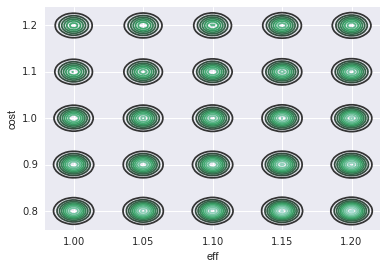

In [118]:
x3 = dfs_ef_all['eff']
y3 = dfs_ef_all['cost']
ax = sns.kdeplot(x3, y3, shade=False, shade_lowest=True)

In [119]:
len(dfs[0])

706

In [124]:
dfs_plot = [[np.min(x['eff']), np.min(x['cost']), len(x)] for x in dfs]

In [127]:
dfs_ = pd.DataFrame(dfs_plot)

In [128]:
dfs_.head()

,0,1,2
0,1.0,0.8,706
1,1.0,0.8,798
2,1.0,0.8,888
3,1.0,0.8,938
4,1.0,0.8,940


In [ ]:
dfs_[0] == 1.0

In [7]:
test = [[np.min(y[0]['eff']), np.min(y[0]['cost']), np.mean([len(y[i]) for i in range(len(y))])] for y in dfs_inst_eff]

In [137]:
print(test)

[[1.0, 0.80000000000000004, 831.0], [1.0, 0.90000000000000002, 825.5], [1.0, 1.0, 751.375], [1.0, 1.1000000000000001, 650.375], [1.0, 1.2, 608.25], [1.05, 0.80000000000000004, 872.0], [1.05, 0.90000000000000002, 818.0], [1.05, 1.0, 771.0], [1.05, 1.1000000000000001, 696.25], [1.05, 1.2, 639.875], [1.1000000000000001, 0.80000000000000004, 887.75], [1.1000000000000001, 0.90000000000000002, 833.5], [1.1000000000000001, 1.0, 799.875], [1.1000000000000001, 1.1000000000000001, 742.125], [1.1000000000000001, 1.2, 661.375], [1.1499999999999999, 0.80000000000000004, 942.0], [1.1499999999999999, 0.90000000000000002, 855.875], [1.1499999999999999, 1.0, 838.5], [1.1499999999999999, 1.1000000000000001, 773.875], [1.1499999999999999, 1.2, 706.5], [1.2, 0.80000000000000004, 949.125], [1.2, 0.90000000000000002, 878.125], [1.2, 1.0, 854.75], [1.2, 1.1000000000000001, 797.75], [1.2, 1.2, 717.625]]


In [146]:
test3 = [[test[i+j][-1] for j in range(5)] for i in range(0,len(test),5)]

In [147]:
print(test3)

[[831.0, 825.5, 751.375, 650.375, 608.25], [872.0, 818.0, 771.0, 696.25, 639.875], [887.75, 833.5, 799.875, 742.125, 661.375], [942.0, 855.875, 838.5, 773.875, 706.5], [949.125, 878.125, 854.75, 797.75, 717.625]]


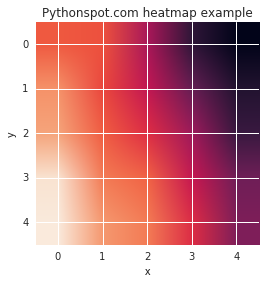

In [148]:
# Plot heatmap
plt.clf()
plt.title('Pythonspot.com heatmap example')
plt.ylabel('y')
plt.xlabel('x')
plt.imshow(test3)
plt.show()

In [175]:
data_heatmap = pd.DataFrame(test3)

In [176]:
data_heatmap.set_index([np.linspace(0.0, 0.2, 5, endpoint=True)])

,0,1,2,3,4
0.00,831.000,825.500,751.375,650.375,608.250
0.05,872.000,818.000,771.000,696.250,639.875
0.10,887.750,833.500,799.875,742.125,661.375
0.15,942.000,855.875,838.500,773.875,706.500
0.20,949.125,878.125,854.750,797.750,717.625


In [16]:
#cmap = sns.palplot(sns.color_palette("Greens"))
plt.figure(figsize = (10,5))
ax = sns.heatmap(data_pivot, cmap="Greens",square=True,xticklabels=True,yticklabels=True)
start = -0.2
end = 0.2
#ax.xaxis.set_ticks(np.linspace(start, end, 5, endpoint=True))
plt.ylabel('Efficiency % change')
plt.xlabel('Cost % change')

plt.savefig('Simulation_results_' + 'tradeoff_' + 'eff_cost' + '_Jul08' + '.png', dpi=300, bbox_inches='tight')

NameError: name 'sns' is not defined

In [156]:
print(ax.xaxis)

XAxis(60.000000,10.000000)


In [171]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")

In [172]:
print(flights)

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237 

In [173]:
type(flights)

pandas.core.frame.DataFrame

In [8]:
data_heatmap = pd.DataFrame(test)

In [9]:
print(data_heatmap)

       0    1           2
0   1.00  0.8  771.710000
1   1.00  0.9  729.540000
2   1.00  1.0  691.040000
3   1.00  1.1  627.740000
4   1.00  1.2  584.111111
5   1.05  0.8  797.580000
6   1.05  0.9  739.730000
7   1.05  1.0  710.950000
8   1.05  1.1  662.120000
9   1.05  1.2  587.790000
10  1.10  0.8  839.550000
11  1.10  0.9  795.560000
12  1.10  1.0  764.810000
13  1.10  1.1  695.830000
14  1.10  1.2  659.810000
15  1.15  0.8  894.250000
16  1.15  0.9  806.684211
17  1.15  1.0  737.368421
18  1.15  1.1  707.702703
19  1.15  1.2  661.530000
20  1.20  0.8  910.200000
21  1.20  0.9  851.220000
22  1.20  1.0  799.410000
23  1.20  1.1  747.350000
24  1.20  1.2  694.460000


In [10]:
data_heatmap.columns= ['eff', 'cost', 'inst']

In [11]:
data_heatmap['inst_share'] = data_heatmap['inst']/10000

In [12]:
data_pivot = data_heatmap.pivot('eff', 'cost', 'inst_share')

In [13]:
print(data_pivot)

cost       0.8       0.9       1.0       1.1       1.2
eff                                                   
1.00  0.077171  0.072954  0.069104  0.062774  0.058411
1.05  0.079758  0.073973  0.071095  0.066212  0.058779
1.10  0.083955  0.079556  0.076481  0.069583  0.065981
1.15  0.089425  0.080668  0.073737  0.070770  0.066153
1.20  0.091020  0.085122  0.079941  0.074735  0.069446


In [14]:
data_pivot = data_pivot.sort_index(level='eff', ascending=False)

In [15]:
print(data_pivot)

cost       0.8       0.9       1.0       1.1       1.2
eff                                                   
1.20  0.091020  0.085122  0.079941  0.074735  0.069446
1.15  0.089425  0.080668  0.073737  0.070770  0.066153
1.10  0.083955  0.079556  0.076481  0.069583  0.065981
1.05  0.079758  0.073973  0.071095  0.066212  0.058779
1.00  0.077171  0.072954  0.069104  0.062774  0.058411


In [196]:
data_heatmap2 = data_heatmap

In [197]:
data_heatmap2['eff'] = data_heatmap2['eff']-1

In [198]:
data_heatmap2['cost'] = data_heatmap2['cost']-1

In [199]:
data_pivot = data_heatmap2.pivot('eff', 'cost', 'inst')

In [200]:
print(data_pivot)

cost     -0.2     -0.1      0.0      0.1      0.2
eff                                              
0.00  831.000  825.500  751.375  650.375  608.250
0.05  872.000  818.000  771.000  696.250  639.875
0.10  887.750  833.500  799.875  742.125  661.375
0.15  942.000  855.875  838.500  773.875  706.500
0.20  949.125  878.125  854.750  797.750  717.625


In [201]:
data_pivot = data_pivot.sort_index(level='eff', ascending=False)

In [ ]:
#get data
#pivot
#sort
#plot

AttributeError: 'list' object has no attribute 'head'